In [2]:
!pip install dask[dataframe]
!pip install optuna

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 9.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
from google.colab import drive
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import lightgbm as lgb
import requests
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
def transform_to_predict(match_info):
    response = requests.get('https://assets.deadlock-api.com/v2/heroes?language=english&only_active=true')
    heroes = pd.DataFrame(response.json())
    heroes_dict = dict(zip(heroes['id'], heroes['name']))

    match_info['net_worth_diff'] = match_info['net_worth_team_1'] - match_info['net_worth_team_0']

    for hero in heroes_dict.keys():
        match_info[f'hero_{hero}'] = 0

    for i in range(1, 7):
        for hero in heroes_dict.keys():
            df[f'hero_{hero}'] += (df[f'hero_id_{i}'] == hero).astype(int)

    for i in range(7, 13):
        for hero in heroes_dict.keys():
            df[f'hero_{hero}'] -= (df[f'hero_id_{i}'] == hero).astype(int)

    match_info['winner_team'] = match_info['winning_team']
    objectives = ['tier1_lane1_0',
       'tier1_lane2_0', 'tier1_lane3_0', 'tier1_lane4_0', 'tier2_lane1_0',
       'tier2_lane2_0', 'tier2_lane3_0', 'tier2_lane4_0', 'titan_0', 'titan_shield_generator_1_0',
       'titan_shield_generator_2_0', 'barrack_boss_lane1_0',
       'barrack_boss_lane2_0', 'barrack_boss_lane3_0', 'barrack_boss_lane4_0',
       'tier1_lane1_1', 'tier1_lane2_1', 'tier1_lane3_1',
       'tier1_lane4_1', 'tier2_lane1_1', 'tier2_lane2_1', 'tier2_lane3_1',
       'tier2_lane4_1', 'titan_1', 'titan_shield_generator_1_1',
       'titan_shield_generator_2_1', 'barrack_boss_lane1_1',
       'barrack_boss_lane2_1', 'barrack_boss_lane3_1', 'barrack_boss_lane4_1']
    match_info[objectives] = match_info[objectives].astype(int)

    features = ['match_id', 'winner_team', 'net_worth_diff'] + [f'hero_{hero}' for hero in heroes_dict.keys()] + ['tier1_lane1_0',
       'tier1_lane2_0', 'tier1_lane3_0', 'tier1_lane4_0', 'tier2_lane1_0',
       'tier2_lane2_0', 'tier2_lane3_0', 'tier2_lane4_0', 'titan_0', 'titan_shield_generator_1_0',
       'titan_shield_generator_2_0', 'barrack_boss_lane1_0',
       'barrack_boss_lane2_0', 'barrack_boss_lane3_0', 'barrack_boss_lane4_0',
       'tier1_lane1_1', 'tier1_lane2_1', 'tier1_lane3_1',
       'tier1_lane4_1', 'tier2_lane1_1', 'tier2_lane2_1', 'tier2_lane3_1',
       'tier2_lane4_1', 'titan_1', 'titan_shield_generator_1_1',
       'titan_shield_generator_2_1', 'barrack_boss_lane1_1',
       'barrack_boss_lane2_1', 'barrack_boss_lane3_1', 'barrack_boss_lane4_1']

    return match_info[features]

In [3]:
df = pd.read_csv('/content/drive/MyDrive/deadlock_data/clean_data.csv')
df = transform_to_predict(df)
df

,match_id,winner_team,net_worth_diff,hero_1,hero_2,hero_3,hero_4,hero_6,hero_7,hero_8,...,tier2_lane2_1,tier2_lane3_1,tier2_lane4_1,titan_1,titan_shield_generator_1_1,titan_shield_generator_2_1,barrack_boss_lane1_1,barrack_boss_lane2_1,barrack_boss_lane3_1,barrack_boss_lane4_1
0,25516143,0.0,0,1,0,-1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,25516143,0.0,-935,1,0,-1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,25516143,0.0,937,1,0,-1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,25516143,0.0,204,1,0,-1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,25516143,0.0,1175,1,0,-1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530265,25079589,0.0,-11384,1,1,0,1,0,0,0,...,1,0,0,1,1,1,1,1,1,1
2530266,25079589,0.0,-10752,1,1,0,1,0,0,0,...,1,0,0,1,1,1,1,1,1,1
2530267,25079589,0.0,-13401,1,1,0,1,0,0,0,...,1,0,0,1,1,1,1,1,1,1
2530268,25079589,0.0,-16943,1,1,0,1,0,0,0,...,0,0,0,1,1,1,1,1,1,1


In [4]:
unique_match_ids = df['match_id'].unique()

train_ids, temp_ids = train_test_split(unique_match_ids, test_size=0.3, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

train_data = df[df['match_id'].isin(train_ids)]
val_data = df[df['match_id'].isin(val_ids)]
test_data = df[df['match_id'].isin(test_ids)]

X_train, y_train = train_data.drop(['match_id', 'winner_team'], axis=1), train_data['winner_team']
X_val, y_val = val_data.drop(['match_id', 'winner_team'], axis=1), val_data['winner_team']
X_test, y_test = test_data.drop(['match_id', 'winner_team'], axis=1), test_data['winner_team']

In [16]:
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 30, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'seed': 42,
        'verbose': -1
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)

    y_val_pred = model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_val_pred)

    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

print("Best params:", study.best_params)

[I 2025-01-23 15:55:37,261] A new study created in memory with name: no-name-782fb16a-aa0d-43a6-8611-22daf2930fb8
[I 2025-01-23 15:56:13,430] Trial 0 finished with value: 0.7887791149919343 and parameters: {'num_leaves': 38, 'learning_rate': 0.13873402143049499, 'feature_fraction': 0.8189906033046512, 'bagging_fraction': 0.9336165877139035, 'min_child_samples': 80}. Best is trial 0 with value: 0.7887791149919343.
[I 2025-01-23 15:56:55,909] Trial 1 finished with value: 0.7890629288947715 and parameters: {'num_leaves': 36, 'learning_rate': 0.061707192231648736, 'feature_fraction': 0.7350982994538611, 'bagging_fraction': 0.7388045911997565, 'min_child_samples': 94}. Best is trial 1 with value: 0.7890629288947715.
[I 2025-01-23 15:57:26,071] Trial 2 finished with value: 0.7804301030632461 and parameters: {'num_leaves': 34, 'learning_rate': 0.2818597673874204, 'feature_fraction': 0.7979019659918797, 'bagging_fraction': 0.887808813569599, 'min_child_samples': 65}. Best is trial 1 with value

Best params: {'num_leaves': 39, 'learning_rate': 0.11122520551073813, 'feature_fraction': 0.9180209608576054, 'bagging_fraction': 0.974704141037931, 'min_child_samples': 70}


In [17]:
params = study.best_params # {'num_leaves': 39, 'learning_rate': 0.11122520551073813, 'feature_fraction': 0.9180209608576054, 'bagging_fraction': 0.974704141037931, 'min_child_samples': 70}

model = lgb.LGBMClassifier(**params)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

print(f'train acc: {roc_auc_score(y_train, train_pred):.2f}')
print(f'val acc: {roc_auc_score(y_val, val_pred):.2f}')
print(f'test acc: {roc_auc_score(y_test, test_pred):.2f}')

train acc: 0.74
val acc: 0.71
test acc: 0.71


In [11]:
response = requests.get('https://assets.deadlock-api.com/v2/heroes?language=english&only_active=true')
heroes = pd.DataFrame(response.json())
heroes_dict = dict(zip(heroes['id'], heroes['name']))

In [13]:
heroes_dict[6]

'Abrams'

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

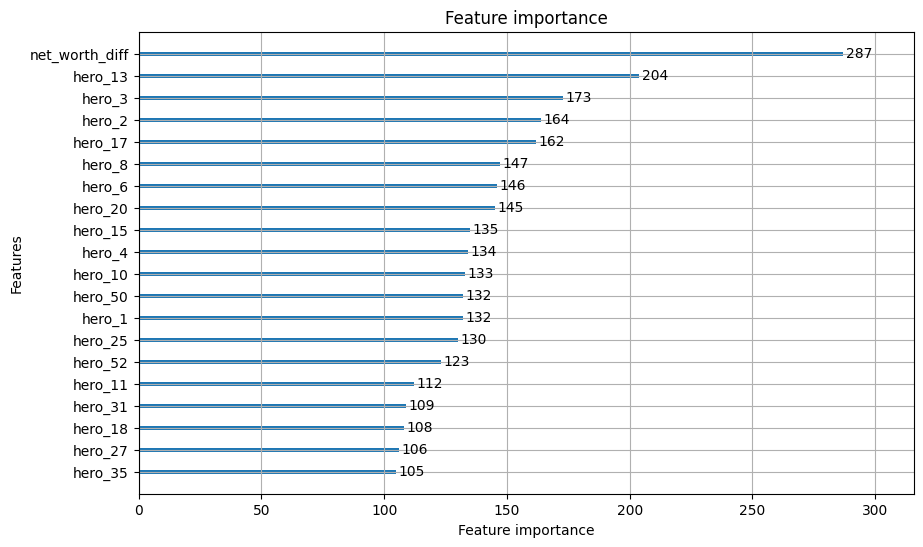

In [18]:
lgb.plot_importance(model, max_num_features=20, figsize=(10, 6))

In [15]:
from joblib import dump
dump(model, 'model.joblib', compress=9)

['model.joblib']